In [119]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np 
from tensorflow.keras.models import load_model

In [17]:
dataset_csv = pd.read_csv("dataset.csv", delimiter=",")
dataset_csv

age  gender       spo2  bpm       temp  sbp  dbp
0        37       0  95.702046   60  36.861707  124   86
1        77       1  96.689413   63  36.511633  126   84
2        68       0  98.508265   63  37.052049  131   78
3        41       0  95.011801   99  36.654747  118   72
4        25       0  98.623792   69  36.975098  138   76
...     ...     ...        ...  ...        ...  ...  ...
200015   75       1  95.357470   87  37.058905  120   84
200016   76       1  99.340786   76  36.463631  131   89
200017   18       0  98.120530   81  36.665477  124   89
200018   66       0  95.362426   83  37.019873  125   86
200019   67       0  99.523058   69  37.012931  133   78

[200020 rows x 7 columns]

In [40]:
dataset_tf = tf.constant(dataset_csv)
dataset_tf = tf.random.shuffle(dataset_tf)
X = dataset_tf[:, 0:5]
Y = dataset_tf[:, 5:]

N = dataset_tf.shape[0]
TRAIN_RATIO = 0.6
VAL_RATIO = 0.2
TEST_RATIO = 0.2

X_train = X[:int(N*TRAIN_RATIO), :]
Y_train = Y[:int(N*TRAIN_RATIO), :]
X_val = X[int(N*TRAIN_RATIO):int(N*(TRAIN_RATIO+VAL_RATIO)), :]
Y_val = Y[int(N*TRAIN_RATIO):int(N*(TRAIN_RATIO+VAL_RATIO)), :]
X_test = X[int(N*(TRAIN_RATIO+VAL_RATIO)):, :]
Y_test = Y[int(N*(TRAIN_RATIO+VAL_RATIO)):, :]

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_dataset = train_dataset.shuffle(buffer_size=5, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
val_dataset = val_dataset.shuffle(buffer_size=5, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))
test_dataset = val_dataset.shuffle(buffer_size=5, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

print(X_train)
print(Y_train)
print(X_val)
print(Y_val)
print(X_test)
print(Y_test)

tf.Tensor(
[[34.          0.         97.72650776 91.         36.05093025]
 [30.          0.         96.47923737 82.         36.15360729]
 [80.          0.         95.74221398 91.         37.49048504]
 ...
 [37.          0.         99.88524373 92.         36.99397711]
 [31.          1.         99.95411961 81.         37.30262839]
 [45.          1.         99.47276614 63.         36.9487483 ]], shape=(120012, 5), dtype=float64)
tf.Tensor(
[[116.  79.]
 [124.  77.]
 [113.  82.]
 ...
 [118.  73.]
 [120.  73.]
 [127.  85.]], shape=(120012, 2), dtype=float64)
tf.Tensor(
[[72.          0.         99.3461096  94.         36.75315195]
 [55.          1.         96.01694051 92.         36.33193241]
 [61.          1.         97.21767493 85.         37.36255571]
 ...
 [72.          0.         96.38553236 78.         36.71039971]
 [21.          0.         97.91214913 87.         36.28220201]
 [26.          0.         96.82770545 83.         36.98363331]], shape=(40004, 5), dtype=float64)
tf.Tensor(


In [46]:
normalizer = Normalization()
normalizer.adapt(X_train)

In [60]:
# model = Sequential(
#     {
#         tf.keras.Input(shape=(None, 5)),
#         normalizer,
#         Dense(10, activation="relu"),
#         Dense(10, activation="relu"),
#         Dense(2, activation="relu")
#     }
# )
# model.summary()
# # model.compile(

input = Input(shape = (5,))
normalizer = Normalization
x = Dense(20, name = 'dense1', activation="relu")(input)
x = Dense(40, name = 'dense2', activation="relu")(x)
x = Dense(20, name = 'dense3', activation="relu")(x)
output = Dense(2)(x)
model = Model(inputs = input ,outputs = output)
model.compile(loss = 'mse', optimizer = 'adam', metrics=[RootMeanSquaredError()])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 512 (2.00 KB)

 Trainable params: 512 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [ ]:
model.fit(train_dataset, validation_data=val_dataset, epochs=200, verbose=1)

Epoch 1/200
3751/3751 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 959.0875 - root_mean_squared_error: 26.4562 - val_loss: 56.4486 - val_root_mean_squared_error: 7.5132
Epoch 2/200
3751/3751 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 56.9496 - root_mean_squared_error: 7.5465 - val_loss: 56.7056 - val_root_mean_squared_error: 7.5303
Epoch 3/200
3751/3751 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 56.9328 - root_mean_squared_error: 7.5453 - val_loss: 56.7257 - val_root_mean_squared_error: 7.5316
Epoch 4/200
3751/3751 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 56.7795 - root_mean_squared_error: 7.5352 - val_loss: 56.4761 - val_root_mean_squared_error: 7.5151
Epoch 5/200
3751/3751 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 56.6441 - root_mean_squared_error: 7.5262 - val_loss: 56.2540 - val_root_mean_squared_error: 7.5003
Epoch 6/200
3751/3751 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 56.5608 - root_mean_squared_error: 7.5206 - val_loss: 56.0931 - val_root_mean_squared_error: 7.4895
Epoch 7/200
3751/37

In [66]:
model.save("model1.keras")

In [70]:
model.evaluate(X_test, Y_test, batch_size=32)


1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 54.4474 - root_mean_squared_error: 7.3788


[54.45574951171875, 7.379414081573486]

In [127]:

input = Input(shape = (5,))
normalizer = Normalization()
# norm = tf.keras.layers.preprocessing.Normalization()
normalizer.adapt(X_train)
x = normalizer(input)
x = Dense(50, name = 'dense1', activation="relu")(x)
x = Dense(50, name = 'dense2', activation="relu")(x)
x = Dense(20, name = 'dense3', activation="relu")(x)
output = Dense(2, activation="relu")(x)
model = Model(inputs = input ,outputs = output)
model.compile(loss = 'mse', optimizer = Adam(learning_rate=0.1), metrics=[RootMeanSquaredError()])
model.summary()

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)     │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization_22                │ (None, 5)              │            11 │
│ (Normalization)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 50)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 20)             │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 2)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,923 (15.33 KB)

 Trainable params: 3,912 (15.28 KB)

 Non-trainable params: 11 (48.00 B)

In [128]:
model.fit(train_dataset, validation_data=val_dataset, epochs=10, verbose=1)

Epoch 1/10
3751/3751 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - loss: 183.3502 - root_mean_squared_error: 11.8526 - val_loss: 60.0515 - val_root_mean_squared_error: 7.7493
Epoch 2/10
3751/3751 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 58.2029 - root_mean_squared_error: 7.6291 - val_loss: 55.3648 - val_root_mean_squared_error: 7.4408
Epoch 3/10
3751/3751 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 56.3821 - root_mean_squared_error: 7.5087 - val_loss: 54.7788 - val_root_mean_squared_error: 7.4013
Epoch 4/10
3751/3751 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 55.8464 - root_mean_squared_error: 7.4730 - val_loss: 55.2640 - val_root_mean_squared_error: 7.4340
Epoch 5/10
3751/3751 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 55.7993 - root_mean_squared_error: 7.4698 - val_loss: 55.0159 - val_root_mean_squared_error: 7.4173
Epoch 6/10
3751/3751 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - loss: 55.7434 - root_mean_squared_error: 7.4661 - val_loss: 54.8871 - val_root_mean_squared_error: 7.4086
Epoch 7/10
3751/3751

1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


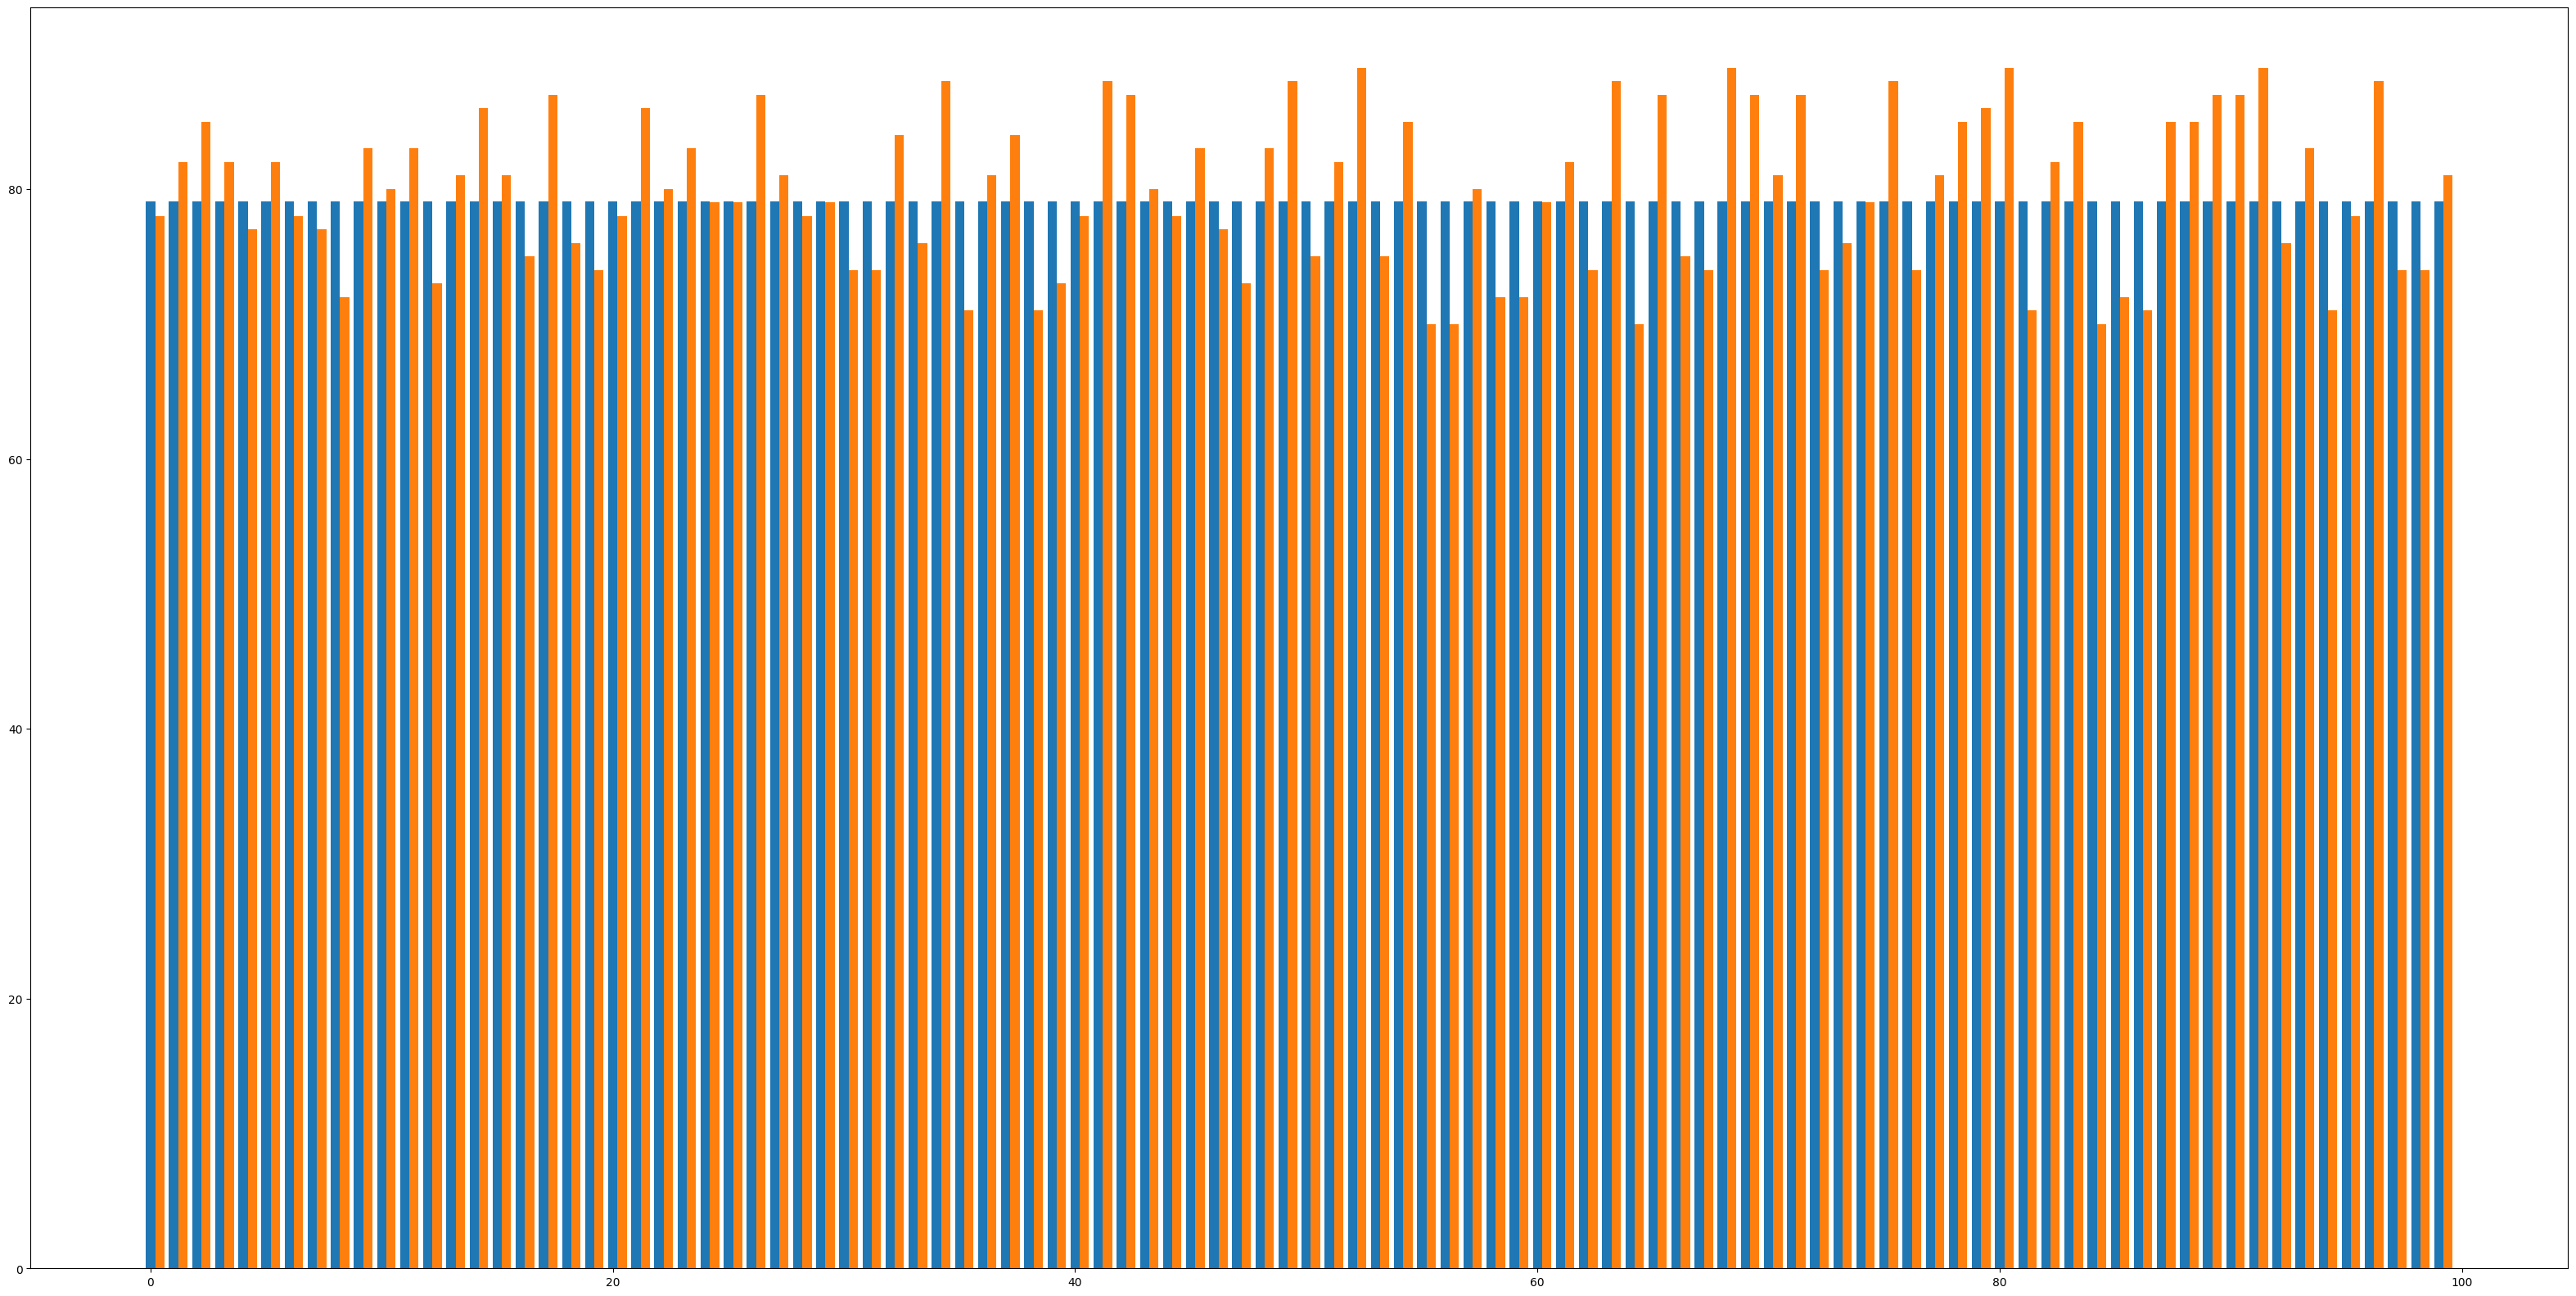

In [132]:
sbp_pred = model.predict(X_test)[:, 1][500:600]
ind = np.arange(100)
plt.figure(figsize=(40, 20))
width = 0.4
plt.bar(ind, sbp_pred, width)
plt.bar(ind+width, Y_test[:, 1][500:600], width)
plt.show()
model.save("model2.keras")